# Analyse predictions

In [1]:
from toolbox import *

import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random
import pickle
import glob
import os

In [2]:
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

## Load model predictions

In [3]:
gs = load_groundwater_station_data('./data/groundwater/bergstraße/gw_stations_bergstraße.csv')
gs = gs[['station_id', 'geometry']]
gs.head()

,station_id,geometry
0,12890,POINT (8.42892 49.70283)
1,12891,POINT (8.48631 49.70426)
2,12892,POINT (8.38953 49.70415)
3,12893,POINT (8.46023 49.70451)
4,12894,POINT (8.40465 49.70432)


In [4]:
pred_folder = './data/predictions'
predictions = {}

for path in glob.iglob(f'{pred_folder}/*.feather'):
    pred_name = os.path.splitext(os.path.basename(path))[0]
    print(pred_name)#, path)
    p = pd.read_feather(path)
    p = pd.merge(p, gs, how='left', on='station_id')
    predictions[pred_name] = p

avg_t+4_p-10
avg_t-4_p+10
avg_t+2_p+05
avg_t+4_p+10
past_data
avg_t0_p0


In [5]:
past = predictions['past_data'].set_index('date')
pred = predictions['avg_t+4_p-10'].set_index('date')
base = predictions['avg_t0_p0'].set_index('date')

In [6]:
past.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 424349 entries, 1971-01-04 to 2020-12-31
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   station_id                  424349 non-null  int64   
 1   ground_elev                 424349 non-null  float64 
 2   x                           424349 non-null  float64 
 3   y                           424349 non-null  float64 
 4   reg_clusters                424349 non-null  float64 
 5   ini_years_water_depth_mean  424349 non-null  float64 
 6   ini_years_water_depth_std   424349 non-null  float64 
 7   ini_years_water_depth_min   424349 non-null  float64 
 8   ini_years_water_depth_max   424349 non-null  float64 
 9   precip_mean                 424349 non-null  float64 
 10  tmean_mean                  424349 non-null  float64 
 11  moisture_mean               424349 non-null  float64 
 12  precip_mean_prev_2d_sum     424349 non-nul

## Analyze predictions over time

Must be resampled because station data begins on different dates.

# todo: continue here

issue with nan values after below operation... solve before moving on to the geometry issue!

In [7]:
keep_cols = ['station_id',# 'geometry',
            'pred_water_depth',
            'tmean_mean_prev_1y_mean',
            'precip_mean_prev_1y_sum']

past_weekly = past[keep_cols + ['water_depth']].groupby(by='station_id').resample('W').mean()
pred_weekly = pred[keep_cols].groupby(by='station_id').resample('W').mean()
base_weekly = base[keep_cols].groupby(by='station_id').resample('W').mean()

In [13]:
past_weekly#[past_weekly.isna().any(axis=1)]

station_id  pred_water_depth  tmean_mean_prev_1y_mean  \
station_id date                                                                
12890      1971-01-10     12890.0          1.623994                 9.336438   
           1971-01-17     12890.0          1.523147                 9.247319   
           1971-01-24     12890.0          1.542001                 9.207984   
           1971-01-31     12890.0          1.500223                 9.307123   
           1971-02-07     12890.0          1.452589                 9.385401   
...                           ...               ...                      ...   
17794      2020-12-06     17794.0          3.421110                11.945822   
           2020-12-13     17794.0          3.421110                11.931233   
           2020-12-20     17794.0          3.426722                11.899863   
           2020-12-27     17794.0          3.411013                11.876986   
           2021-01-03     17794.0          3.416625                11.902329   

                       precip_mean_prev_1y_sum  water_depth  
station_id date                                              
12890      1971-01-10               771.942857         1.46  
           1971-01-17               754.285714         1.59  
           1971-01-24               751.985714         1.76  
           1971-01-31               762.800000         1.74  
           1971-02-07               768.242857         1.71  
...                                        ...          ...  
17794      2020-12-06               574.675000         3.08  
           2020-12-13               582.100000         3.08  
           2020-12-20               544.525000         3.06  
           2020-12-27               539.650000         3.03  
           2021-01-03               574.250000         3.01  

[382941 rows x 5 columns]

In [9]:
for id in past_weekly.station_id.unique():
    print(id)

12890.0
nan
12891.0
12892.0
12893.0
12894.0
12896.0
12898.0
12899.0
12900.0
12901.0
12902.0
12905.0
12907.0
12908.0
12909.0
12911.0
12914.0
12922.0
12923.0
12924.0
12925.0
12926.0
12927.0
12942.0
12944.0
12946.0
12947.0
12949.0
12950.0
12967.0
12977.0
12990.0
13023.0
13025.0
13031.0
13032.0
13042.0
13045.0
13105.0
13111.0
13149.0
13157.0
13159.0
13161.0
13162.0
13164.0
13432.0
13433.0
13434.0
13437.0
13439.0
13440.0
13466.0
13470.0
13473.0
13475.0
13477.0
13479.0
13484.0
13485.0
13487.0
13488.0
13489.0
13490.0
13491.0
13492.0
13494.0
13495.0
13496.0
13498.0
13499.0
13500.0
13501.0
13502.0
13503.0
13504.0
13506.0
13508.0
13509.0
13510.0
13513.0
13514.0
13516.0
13518.0
13539.0
13540.0
13541.0
13544.0
13547.0
13548.0
13549.0
13550.0
13556.0
13557.0
13564.0
13568.0
13581.0
13582.0
13584.0
13586.0
13588.0
13589.0
13594.0
13595.0
13596.0
13597.0
13601.0
13612.0
13613.0
13615.0
13622.0
13623.0
13626.0
13627.0
13630.0
13635.0
13652.0
13658.0
13670.0
13689.0
13695.0
13696.0
13698.0
13703.0
1370

In [8]:
#past_weekly = past_weekly.droplevel(0)

In [ ]:
#past_weekly = pd.merge(past_weekly, past[['station_id', 'geometry']],
#                       how='left', on='station_id')

In [ ]:
#pred_weekly = pd.merge(pred_weekly, base[['station_id', 'geometry']],
#                       how='left', on='station_id')

In [ ]:
#base_weekly = pd.merge(base_weekly, base[['station_id', 'geometry']],
#                       how='left', on='station_id')

In [ ]:
# convert to geopandas
past_weekly = gpd.GeoDataFrame(past_weekly, geometry=past_weekly['geometry'], crs='EPSG:4326')
pred_weekly = gpd.GeoDataFrame(pred_weekly, geometry=pred_weekly['geometry'], crs='EPSG:4326')
base_weekly = gpd.GeoDataFrame(base_weekly, geometry=base_weekly['geometry'], crs='EPSG:4326')

In [8]:
#past_weekly

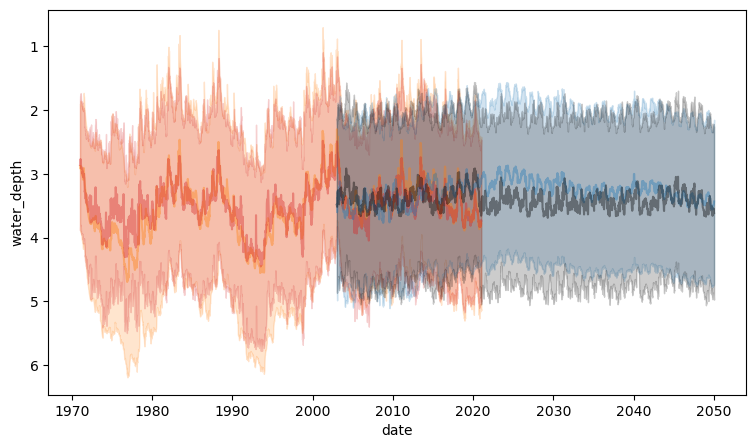

In [17]:
fig, ax = plt.subplots(figsize=(9,5))
ax.invert_yaxis()
sns.lineplot(data=past_weekly, x="date", y="water_depth", 
             errorbar='sd', color='tab:orange', alpha=0.4, ax=ax)
sns.lineplot(data=past_weekly, x="date", y="pred_water_depth", 
             errorbar='sd', color='tab:red', alpha=0.4, ax=ax)
sns.lineplot(data=pred_weekly, x="date", y="pred_water_depth", 
             errorbar='sd', color='tab:blue', alpha=0.4, ax=ax)
sns.lineplot(data=base_weekly, x="date", y="pred_water_depth", 
             errorbar='sd', color='k', alpha=0.4, ax=ax)
#ax.axhline(y=0, color='k', alpha=0.7)

#plt.xlim(pd.to_datetime('1960-01-01'), pd.to_datetime('1990-01-01'))
#plt.tight_layout()
plt.show()

In [20]:
pred_weekly['base_water_depth'] = base_weekly['pred_water_depth']
pred_weekly['water_depth_anomaly'] = pred_weekly['pred_water_depth'] - pred_weekly['base_water_depth']

In [21]:
pred_weekly['water_depth_anomaly']

station_id  date      
12890       2003-01-05   -0.245819
            2003-01-12   -0.227232
            2003-01-19   -0.097778
            2003-01-26   -0.268409
            2003-02-02   -0.200015
                            ...   
17794       2049-12-05   -0.546095
            2049-12-12   -0.516242
            2049-12-19   -0.549539
            2049-12-26   -0.593531
            2050-01-02   -0.619224
Name: water_depth_anomaly, Length: 520036, dtype: float64

### Anomalies for all stations
neg. anomaly = scenario predicts shallower water than in ref scenario

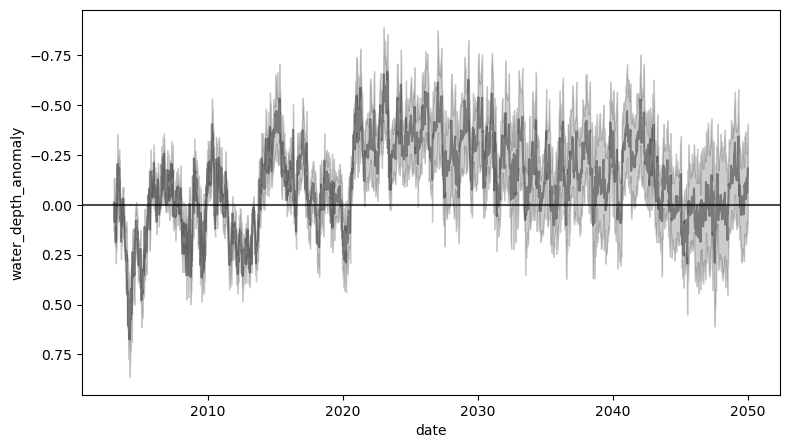

In [22]:
fig, ax = plt.subplots(figsize=(9,5))
ax.invert_yaxis()
sns.lineplot(data=pred_weekly, x="date", y="water_depth_anomaly", 
             errorbar='sd', color='k', alpha=0.4, ax=ax)
ax.axhline(y=0, color='k', alpha=0.7)

In [23]:
# Load hillshade DEM
dem, dem_extent = load_dem('./data/dem/bergstraße30_shaded.tif')

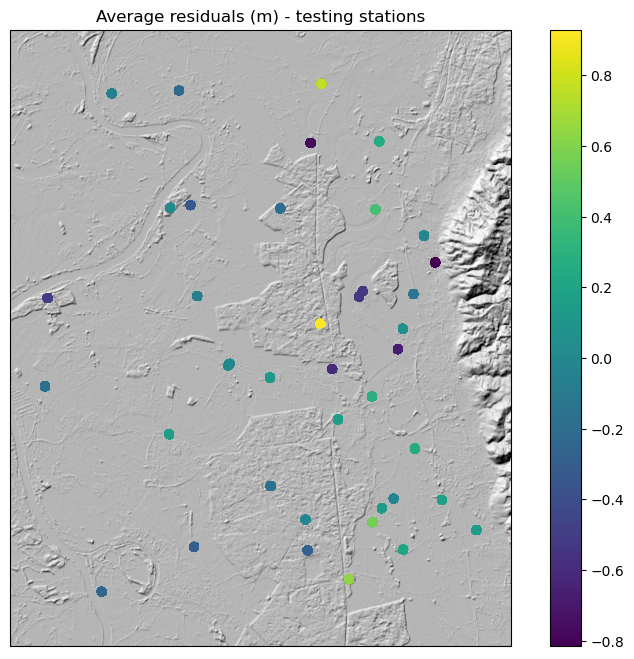

In [51]:
extent = stats.geometry.total_bounds

# Create a figure and axis with a PlateCarree projection
fig, ax = plt.subplots(figsize=(10, 8), 
                       subplot_kw={'projection': ccrs.PlateCarree()} # removes axis labels
                      )

# Plot hillshade DEM
ax.imshow(dem, extent=(dem_extent[0], dem_extent[2],
                       dem_extent[1], dem_extent[3]),
          cmap='gray', origin='upper', aspect='auto')

pred_weekly.plot(column='residuals_mean',
            #cmap='coolwarm',
            legend=True, 
            ax=ax)

ax.set_xlim(extent[0]-0.02, extent[2]+0.02)
ax.set_ylim(extent[1]-0.02, extent[3]+0.02)

#ax.legend(loc='lower left', framealpha=0.5)

plt.title('Residual averages (m) - testing stations')
#plt.savefig('./figs/map_mean_water_depth_all_stations.png', bbox_inches='tight')

# Show the plot
plt.show()